In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading the Dataset****

In [37]:
data = pd.read_csv("../input/creditcardfraud/creditcard.csv")

Check First five column

In [38]:
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
data.shape

(284807, 31)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [41]:
data.tail()    #last five rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [42]:
data.isnull().sum()  #check the null value in the data

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [43]:
#Check the distribution of legit transaction and Fraudulent transaction

data['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In above 
0= Normal transactions
1= Fraudulent transactions

In [44]:
#Seperating the data for analysis

legit = data[data.Class == 0]
Fraud = data[data.Class == 1]

In [45]:
print(legit.shape)
print(Fraud.shape)

(284315, 31)
(492, 31)


In [46]:
#Statical measure of the data 

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [47]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [48]:
#Compare the values for both Transactions

data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Visualize the DataSet

****

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


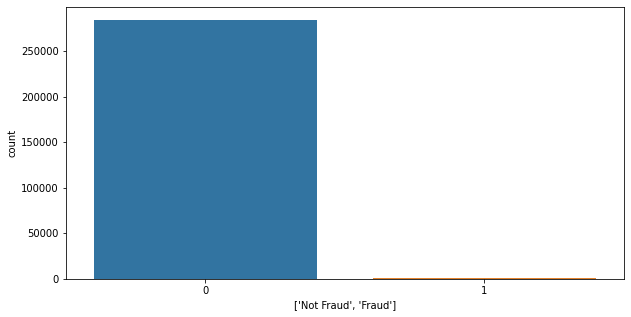

In [49]:
plt.figure(figsize=(10,5))
g=sns.countplot(data['Class'])
g.set_xlabel(['Not Fraud' , 'Fraud']);
plt.show()

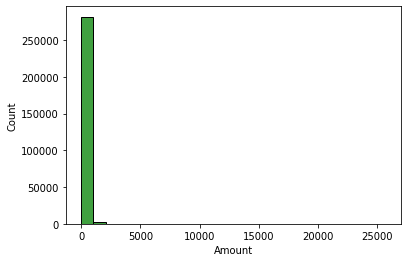

In [50]:
sns.histplot(data['Amount'] , bins =25,color = 'green');

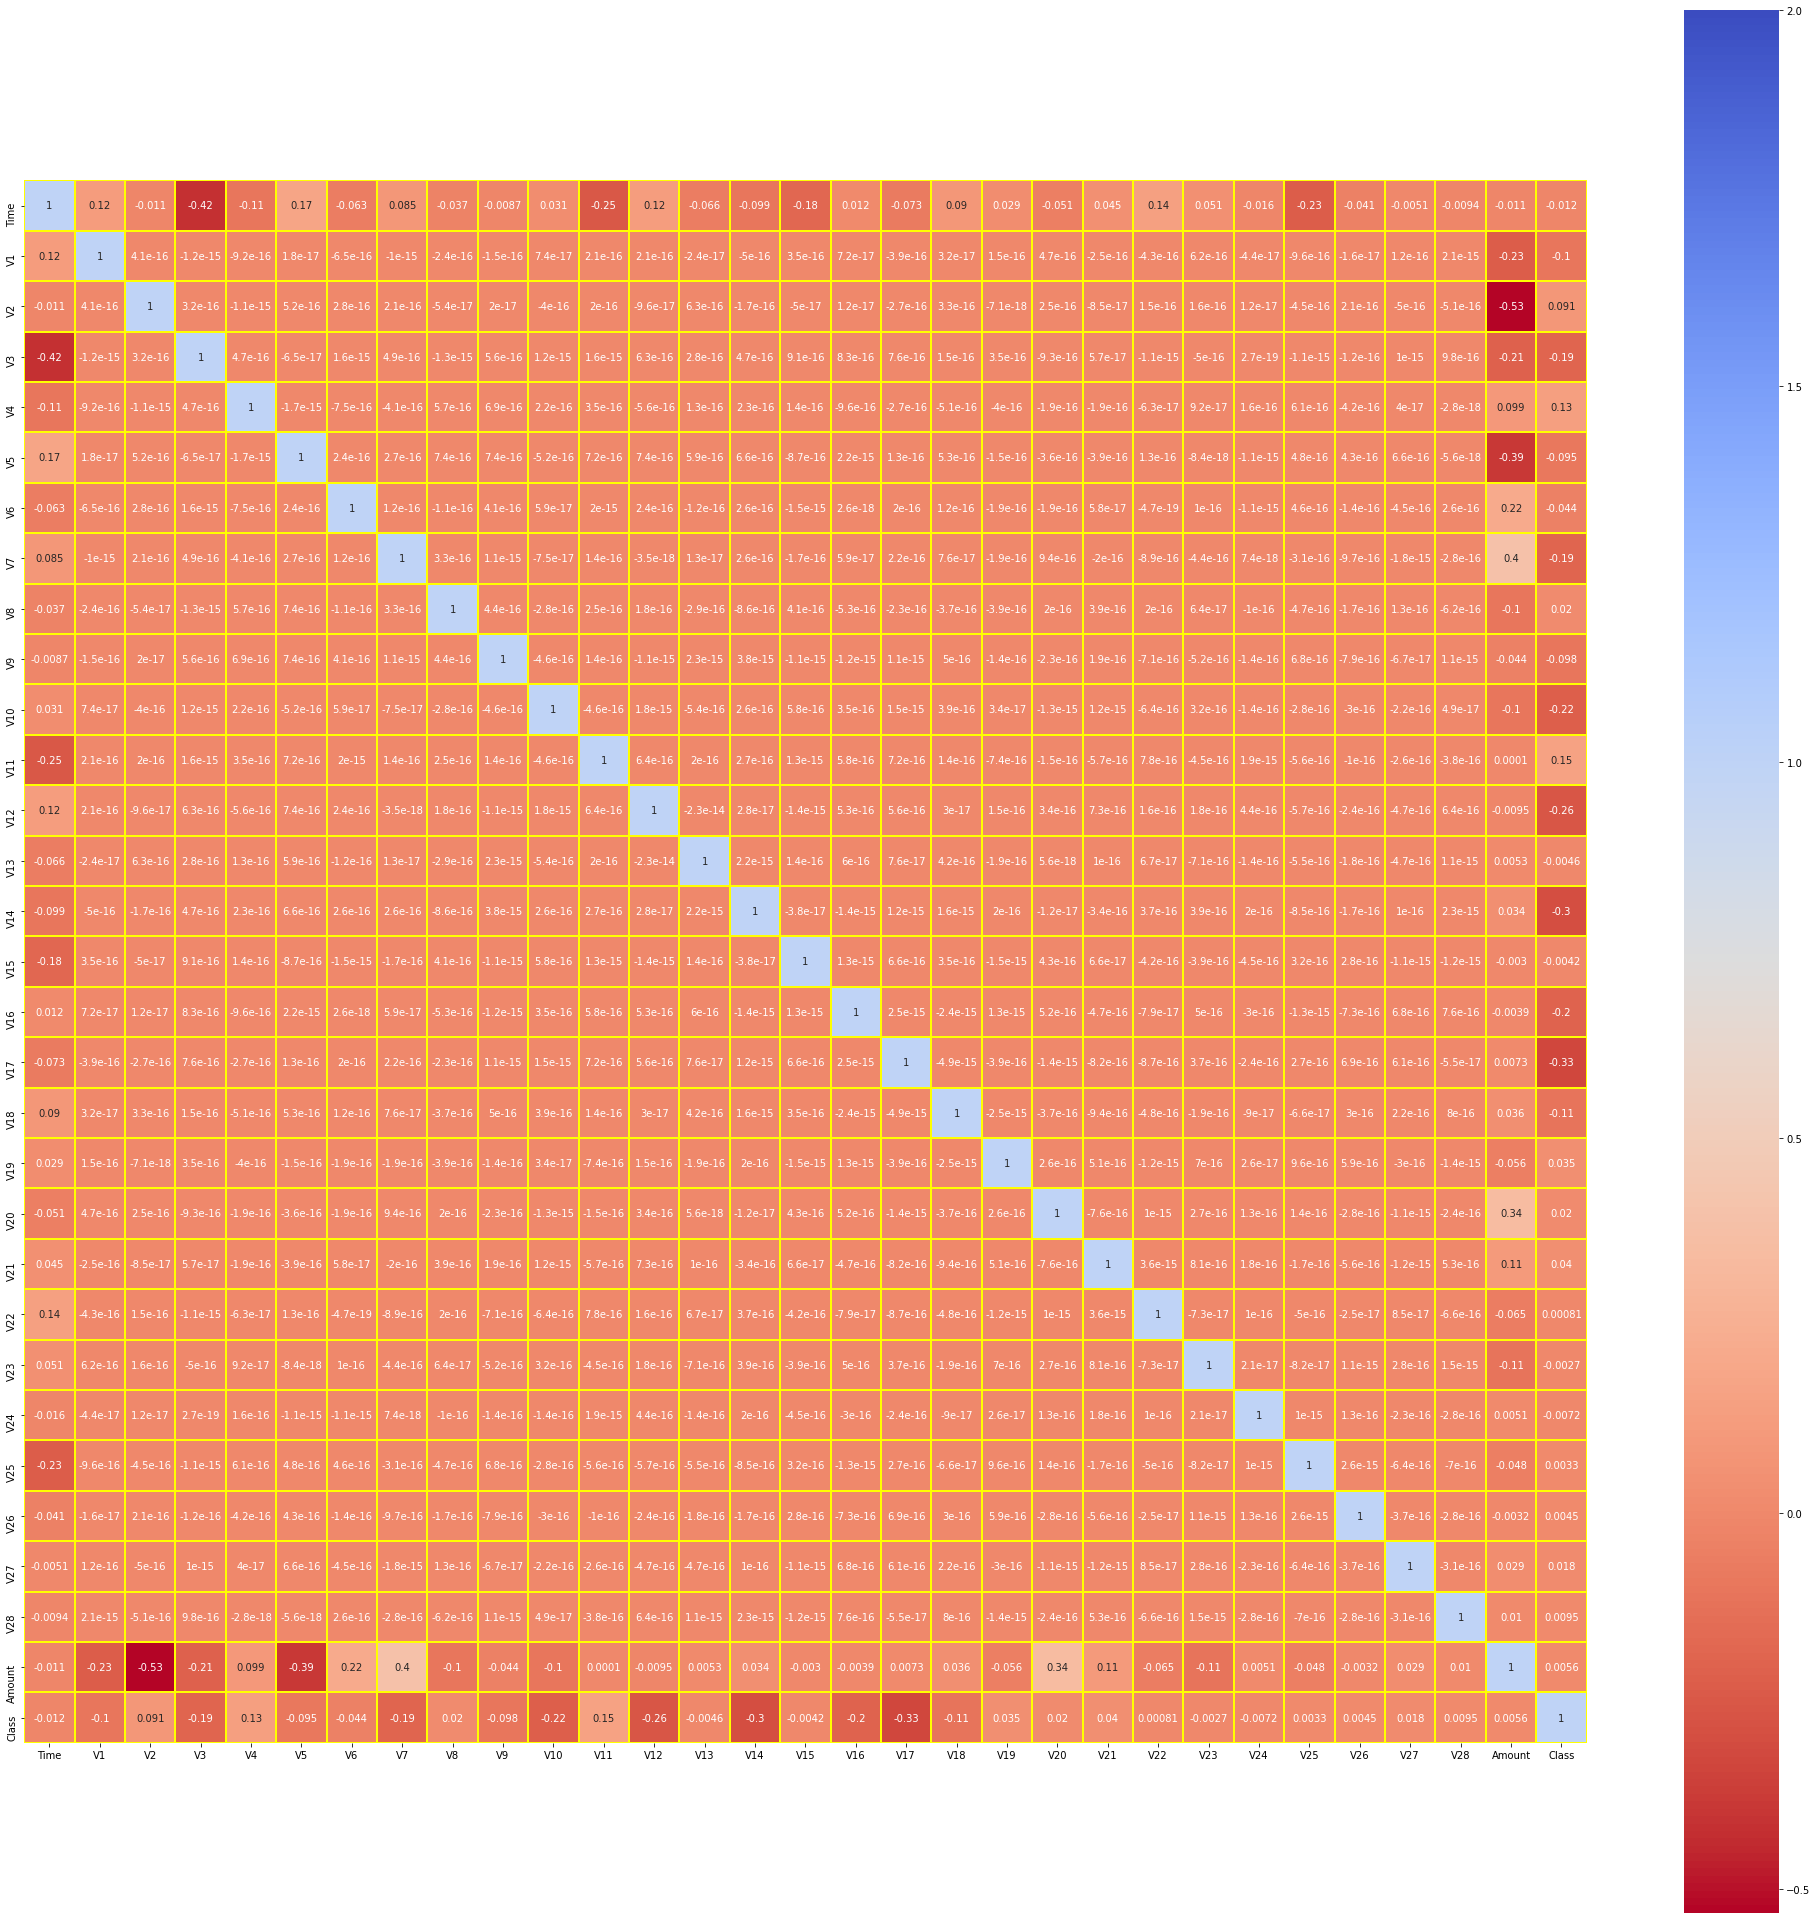

In [51]:
colormap = 'coolwarm_r'

plt.figure(figsize = (35 ,35))
sns.heatmap(data.corr(),linewidths = 2.0 , vmax = 2.0,
           square = True,cmap = colormap , linecolor = 'yellow' ,annot = True)

plt.show()

In [52]:
X = data.drop('Class' , axis=True)
y = data['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 ,random_state = 42)

Train the Algorithm****

# Logistic Regression:-

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train ,y_train)

y_pred = logreg.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
#Calculate model accuracy score by comparing y_test and y_pred

acc_logisreg = round(accuracy_score(y_test , y_pred) * 100,2)
print("Accuracy of Logistic regression model :" , acc_logisreg )

Accuracy of Logistic regression model : 99.86


# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Calculate the model accuracy by comparing y_test and y_pred
acc_rf = round(accuracy_score(y_test , y_pred)*100, 2)
print('Accuracy of Random Forest:',acc_rf)

Accuracy of Random Forest: 99.96


# Support Vector Machine

In [56]:
from sklearn import svm
model =svm.SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
 
#Calculate Model accuracy by comparing y_test and y_pred

acc_svc = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy of support vector classifier:',acc_svc)

Accuracy of support vector classifier: 99.83


# K-Nearest Neighbour

In [57]:
from sklearn.neighbors import KNeighborsClassifier  #import KNN Algorithmn

model = KNeighborsClassifier()  #Initialize the KNN model with value of k=5
model.fit(X_train , y_train)    #Train the model with training the dataset
y_pred = model.predict(X_test)  #prediction using the test dataset

#Calculate the model accuracy by comparing y_test and y_pred

acc_knn = round(accuracy_score(y_test, y_pred) *100,2)
print('Accuracy of KNN Classifier:',acc_knn)

Accuracy of KNN Classifier: 99.84


# Decision Tree

In [58]:
#import library for decision tree classifier

from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier

model = DecisionTreeClassifier()

#Train the model using training dataset

model.fit(X_train, y_train)

#Prediction using test data

y_pred = model.predict(X_test)


In [59]:
#Calculate Model accuracy by comparing y_test and y_pred

acc_dtree = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy of Decision Tree :',acc_dtree)

Accuracy of Decision Tree : 99.9


# Model Selection

In [60]:
models = pd.DataFrame({"Model":['Logistic Regression','Decision Tree','Support Vector Machine','K-Nearest Neighbors','Random Forest']

,"Score": [acc_logisreg,acc_dtree,acc_svc, acc_knn, acc_rf]})
    
models.sort_values(by='Score',ascending=False)

,Model,Score
4,Random Forest,99.96
1,Decision Tree,99.90
0,Logistic Regression,99.86
3,K-Nearest Neighbors,99.84
2,Support Vector Machine,99.83


[[56828    36]
 [   22    76]]


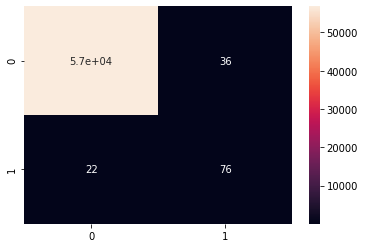

In [61]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)
sns.heatmap(cm, annot=True);